In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import pickle
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv('IMDB Dataset.csv')

In [8]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
def preprocess_text(text):
    text = text.lower()  
    text = ''.join([char for char in text if char not in string.punctuation])  
    text = ' '.join([word for word in text.split() if word not in stop_words])  
    return text

In [10]:
df['review'] = df['review'].apply(preprocess_text)

In [11]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [12]:
positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

In [13]:
positive_text = ' '.join(positive_reviews)
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

In [14]:
negative_text = ' '.join(negative_reviews)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

In [15]:
plt.figure(figsize=(16, 8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

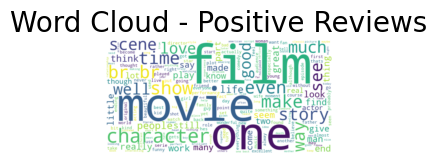

In [17]:
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Word Cloud - Positive Reviews", fontsize=20)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

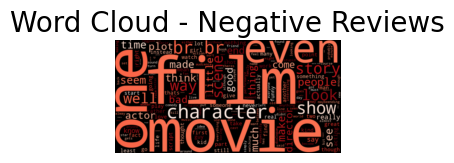

In [18]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Word Cloud - Negative Reviews", fontsize=20)
plt.axis('off')

In [19]:
plt.show()

In [20]:
X = df['review']
y = df['sentiment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
model = make_pipeline(TfidfVectorizer(), LogisticRegression())


In [23]:
model.fit(X_train, y_train)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [24]:
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Model Accuracy: 89.82%


In [25]:
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)